We now evaluate the models. We start by comparing the counts of false positives to false negatives for each model, but now they are evaluated on the same continuous day sample of daily living.

In [1]:
import sys
import os
import torch

sys.path.append(os.path.abspath('..')) #so we can import for the dir above

from RegNet import RegNet
from eval_in_time_domain import eval_in_time_domain

In [2]:
RECODING_TO_EVAL_ON = '/home/kuba/Documents/data/raw/kuba_watch_data/2024-07-10_06_42_46'
PATH_TO_BOUT_DIR = '/home/kuba/Documents/data/raw/listerine/3_final'


WINDOW_SIZE = 400
STRIDE = 50
CONFIDANCE_THRESHOLD = 0.8
OVERLAP_THRESHOLD = 0.45
MIN_BOUT_LEN = 400
NUM_BOUT_TO_SAMP = 20
DEVICE = 'cuda:0'

WARNING we will sample bouts from all participants there will be data leakage, unless you specify who not to sample from
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 997, Gyro: 997
Bout shape - Acc: 665, Gyro: 665
Bout shape - Acc: 417, Gyro: 417
Bout shape - Acc: 499, Gyro: 499
Bout shape - Acc: 523, Gyro: 523
Bout shape - Acc: 574, Gyro: 574
Bout shape - Acc: 416, Gyro: 416
Bout shape - Acc: 1500, Gyro: 1500
Bout shape - Acc: 418, Gyro: 418
Bout shape - Acc: 1744, Gyro: 1744
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 801, Gyro: 801
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 542, Gyro: 542
Bout shape - Acc: 417, Gyro: 417
Bout shape - Acc: 1570, Gyro: 1570
Bout shape - Acc: 499, Gyro: 499
Bout shape - Acc: 569, Gyro: 569
Bout shape - Acc: 497, Gyro: 497
The recording partitioned into windows has shape of: torch.Size([51912, 6, 400])


/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


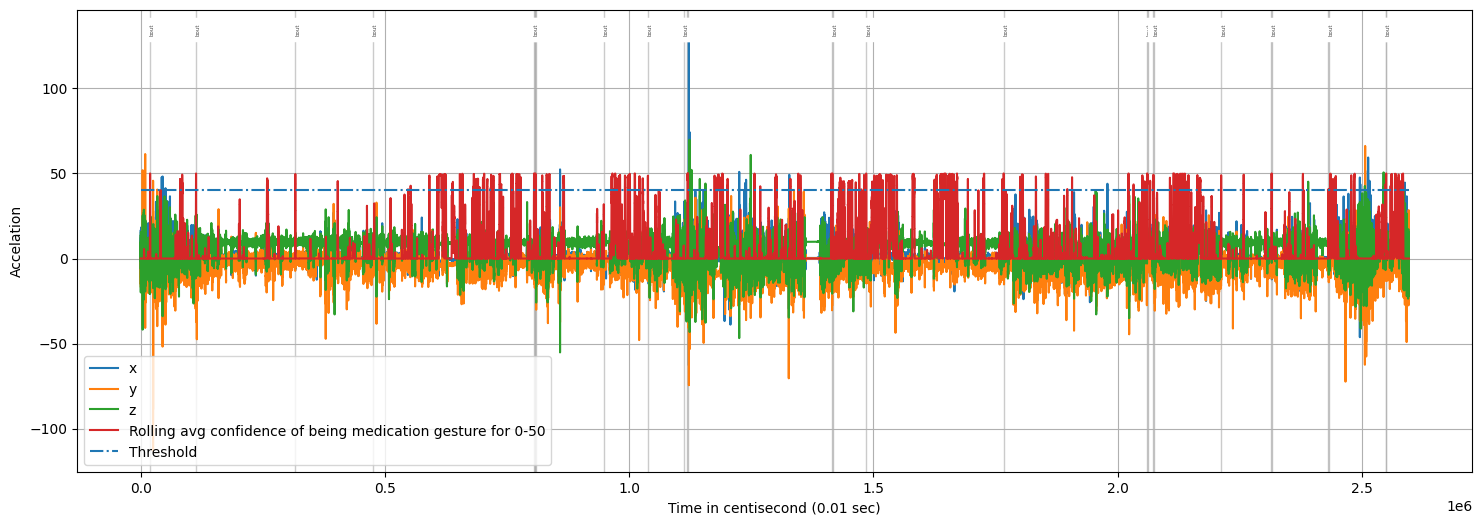

There are 330 FP's of 6489 total windows (FP is -> confidance over: 0.8 and less that 45.0% overlap with a real bout)
FP's are at rate of 5.09%
Fn's are at rate of 0.2003%
Normalized on True


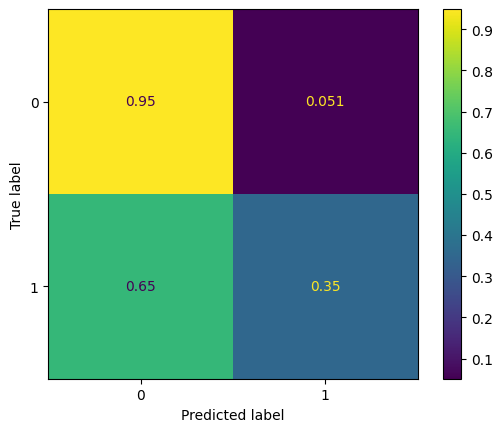

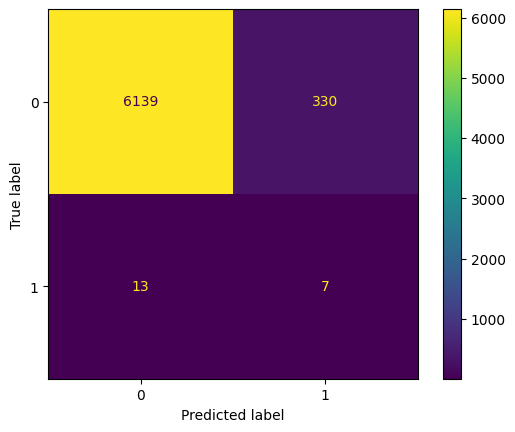

In [3]:
#load model00
model00_path = '/home/kuba/projects/medication-taking-data/new_start/week02/00_no_movment/94f1_with_filter_noMovmets.pth'
model = RegNet()
model.load_state_dict(torch.load(model00_path))

#get false postive count

TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
                                            confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
                                            num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)


WARNING we will sample bouts from all participants there will be data leakage, unless you specify who not to sample from
Bout shape - Acc: 693, Gyro: 693
Bout shape - Acc: 548, Gyro: 548
Bout shape - Acc: 419, Gyro: 419
Bout shape - Acc: 418, Gyro: 418
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 524, Gyro: 524
Bout shape - Acc: 420, Gyro: 420
Bout shape - Acc: 400, Gyro: 400
Bout shape - Acc: 523, Gyro: 523
Bout shape - Acc: 844, Gyro: 844
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 1203, Gyro: 1203
Bout shape - Acc: 794, Gyro: 794
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 619, Gyro: 619
Bout shape - Acc: 400, Gyro: 400
Bout shape - Acc: 419, Gyro: 419
Bout shape - Acc: 415, Gyro: 415
Bout shape - Acc: 439, Gyro: 439
The recording partitioned into windows has shape of: torch.Size([51912, 6, 400])


/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


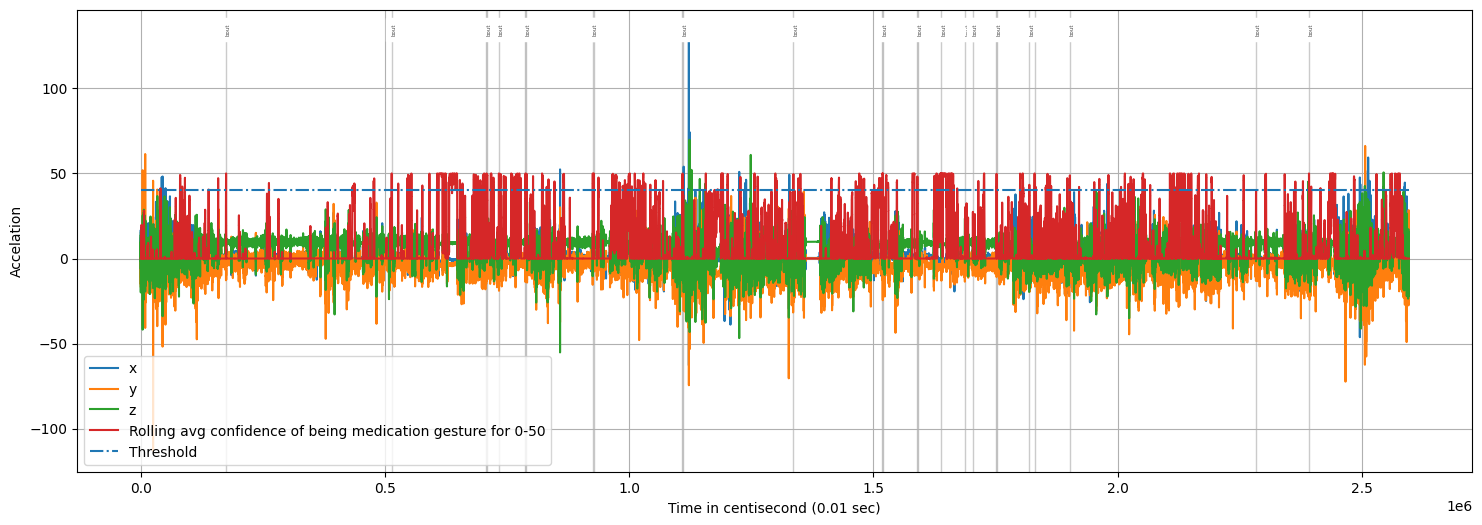

There are 379 FP's of 6489 total windows (FP is -> confidance over: 0.8 and less that 45.0% overlap with a real bout)
FP's are at rate of 5.84%
Fn's are at rate of 0.2312%
Normalized on True


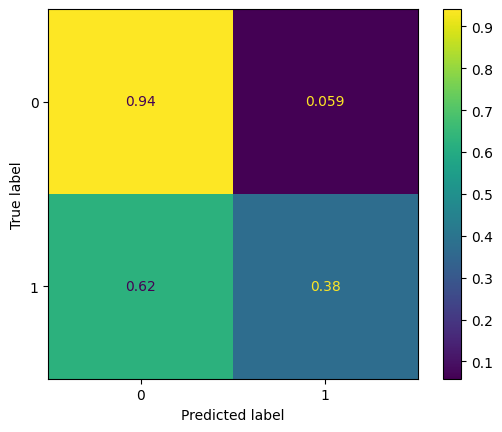

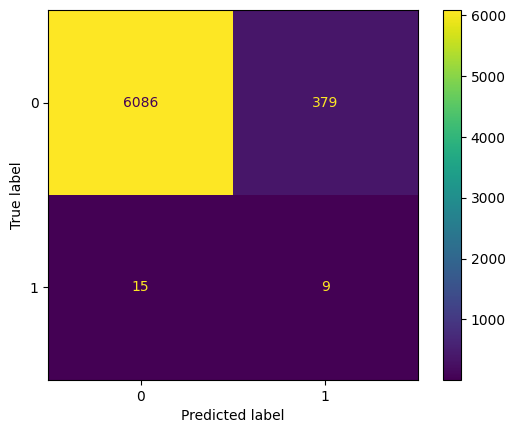

In [4]:
#load model01
model01_path = '/home/kuba/projects/medication-taking-data/new_start/week02/00_no_movment/94f1_without_filter_noMovments.pth'
model = RegNet()
model.load_state_dict(torch.load(model01_path))
#get false postive count
TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
                                            confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
                                            num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)

Now lets do the same but look at false negatives